Understanding what exactly the covariance matrix __C__ means is not altogether intuitive. We talk about covariance and variance... but what do we mean by the variance in a single tip? or the covariance between two tips? Don't you need replication to calculate variance?

You do. What __C__ is is the _expected_ covariance under a Brownian motion model, which has a straightforward frequentist interpretation: if you reran evolution repeatedly, __C__ is the variance and covariance you would expect to find.

Let's do this experiment. Generate a tree and calculate __C__:

Loading required package: ape

Loading required package: phytools

Loading required package: maps



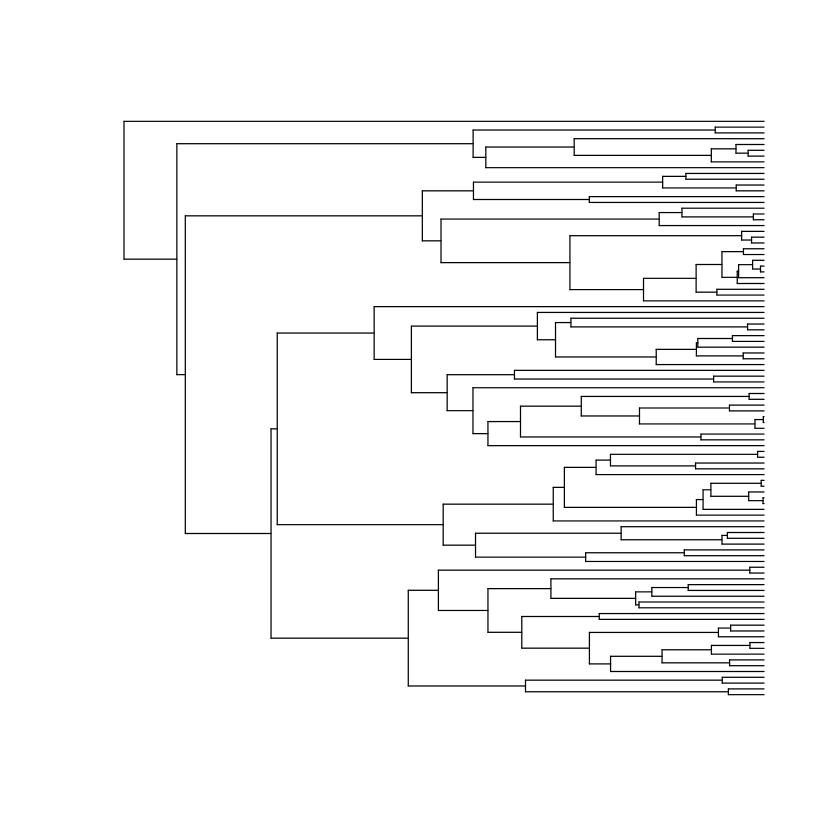

In [1]:
library(geiger)
tr <- sim.bdtree(n = 100)
C = as.dist(vcv(tr))
plot(tr, show.tip.label = F)

Now, simulate 1000 datasets on this tree, and calculate the covariance matrix directly from the datasets:

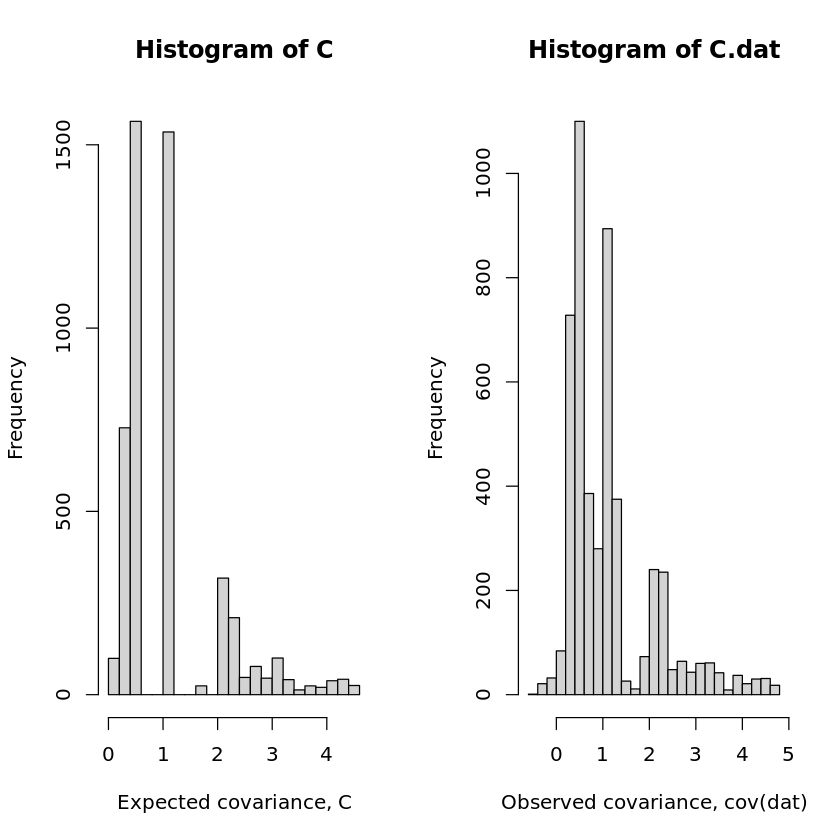

In [2]:
dat <- sim.char(tr, 1, 1000)
C.dat = as.dist(cov(t(dat[,,]))) # use t to transpose so that you get the covariance among tips, not among datasets
layout(matrix(1:2, 1))
hist(C, 20, xlab = "Expected covariance, C")
hist(C.dat, 20, xlab = "Observed covariance, cov(dat)")

You can see these both have similar distributions. Let's plot them, with a line of slope = 1 and intercept = 0 for comparison:

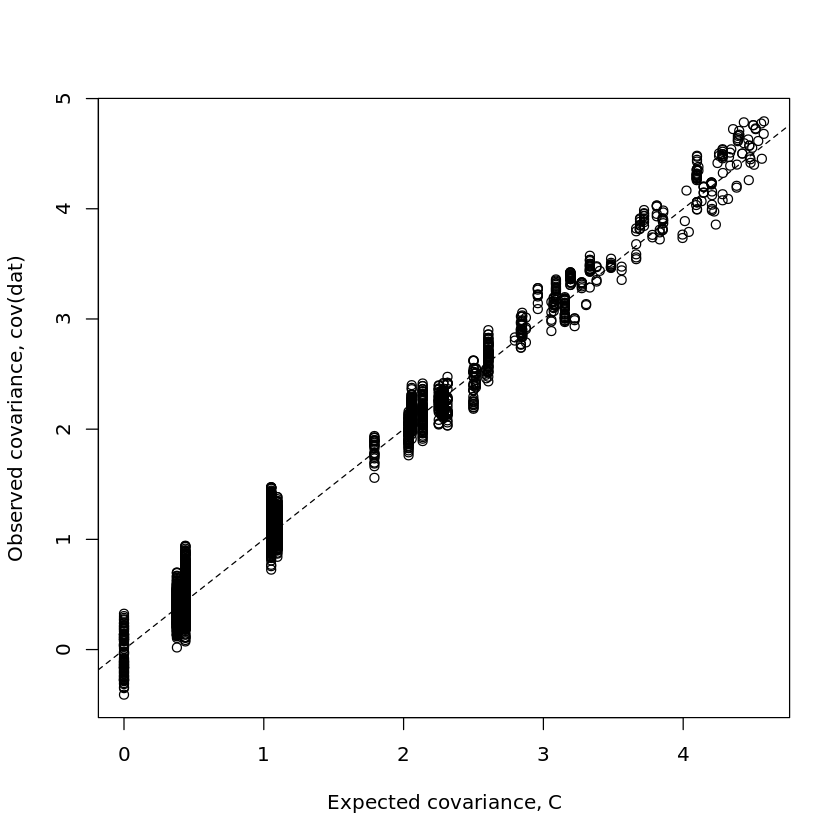

In [8]:
plot(C, C.dat, xlab = 'Expected covariance, C', ylab = 'Observed covariance, cov(dat)')
abline(a = 0, b = 1, lty = 'dashed')

There is definitely a strong linear relationship:

In [4]:
summary(lm(C~C.dat))


Call:
lm(formula = C ~ C.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46157 -0.08539  0.00689  0.09020  0.48316 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.021434   0.002950  -7.265 4.33e-13 ***
C.dat        0.978039   0.002014 485.700  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.133 on 4948 degrees of freedom
Multiple R-squared:  0.9795,	Adjusted R-squared:  0.9795 
F-statistic: 2.359e+05 on 1 and 4948 DF,  p-value: < 2.2e-16


and observed covariance has, as you might imagine, larger error. But in either case, this demonstration shows, I hope, that __C__ is readily interpreted as the expected covariance in your dataset, considering your dataset as one of many possible evolutionary outcomes under the model of evolution you are testing.

For this reason, we have more power to identify models of evolution if we multiple traits that we have reason to believe evolved under the same process.